<a href="https://colab.research.google.com/github/dprincef/Day1_Task/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

 !curl -s https://course.fast.ai/setup/colab | bash

In [1]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
!pip install "torch==1.4" "torchvision==0.5.0"

  Using cached torch-1.4.0-cp36-cp36m-manylinux1_x86_64.whl (753.4 MB)
  Using cached torchvision-0.5.0-cp36-cp36m-manylinux1_x86_64.whl (4.0 MB)
  Using cached Pillow-7.2.0-cp36-cp36m-manylinux1_x86_64.whl (2.2 MB)
  Attempting uninstall: torch
    Found existing installation: torch 0.3.0.post4
    Uninstalling torch-0.3.0.post4:
      Successfully uninstalled torch-0.3.0.post4
  Attempting uninstall: pillow
    Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.1.9
    Uninstalling torchvision-0.1.9:
      Successfully uninstalled torchvision-0.1.9
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.


In [1]:
import fastai
from  fastai import *
from fastai.vision import *

import matplotlib.pyplot as plt


In [3]:
from PIL import Image

In [4]:
a = 1
b = a+1
c = b+a+1
d = c+ b+a +1
a,b,c,d

(1, 2, 4, 8)

In [5]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [6]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [8]:
path_anno = path/'annotations'
path_img = path/'images'

In [9]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_48.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_9.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_157.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_21.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_86.jpg')]

In [10]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [11]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms = get_transforms(),size=224)
data.normalize = (imagenet_stats)

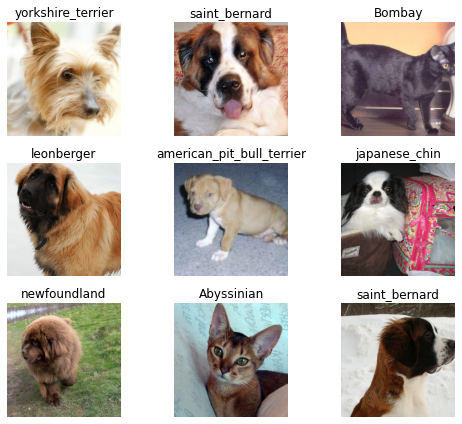

In [12]:
data.show_batch(rows=3,figsize=(7,6))

In [13]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

Training

In [14]:
learn = cnn_learner(data,models.resnet34,metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.374335,0.326706,0.103518,01:50
1,0.610191,0.286983,0.096752,01:45
2,0.407622,0.250873,0.081191,01:48
3,0.288989,0.231605,0.076455,01:49


In [16]:
learn.save('stage-1') 

In [17]:
 interp = ClassificationInterpretation.from_learner(learn)

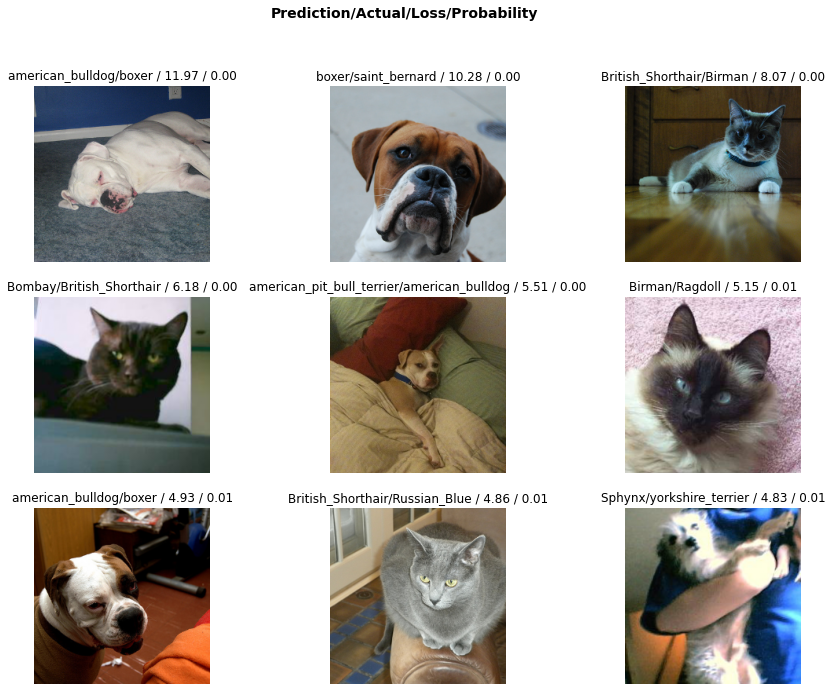

In [18]:
interp.plot_top_losses(9,figsize=(15,11))

In [19]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 9),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Egyptian_Mau', 'Bengal', 4),
 ('beagle', 'basset_hound', 4),
 ('boxer', 'american_bulldog', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Ragdoll', 'Birman', 3),
 ('havanese', 'yorkshire_terrier', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Birman', 'Ragdoll', 2),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Egyptian_Mau', 'Abyssinian', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('american_bulldog', 'american_pit_bull_terrier', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

Unfreezing, fine-tuning and learning rates

In [20]:
learn.unfreeze()

In [21]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.650610,0.381308,0.113667,01:54


In [22]:
 interp = ClassificationInterpretation.from_learner(learn)

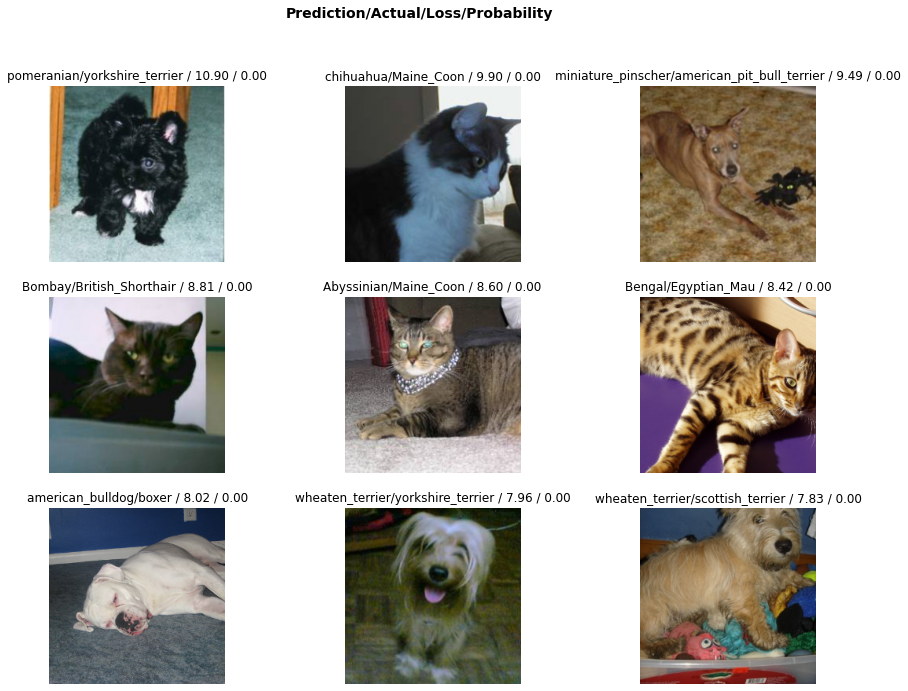

In [23]:
interp.plot_top_losses(9,figsize=(15,11))

In [24]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Maine_Coon,Egyptian_Mau,pug,wheaten_terrier,pomeranian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,Birman,scottish_terrier,pomeranian,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3

In [27]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


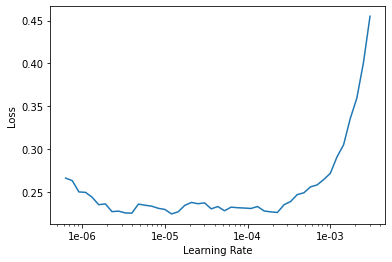

In [28]:
learn.recorder.plot()

In [29]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.228894,0.213789,0.074425,01:53
1,0.219225,0.210896,0.069012,01:53


In [30]:
path = untar_data(URLs.MNIST_SAMPLE); path

PosixPath('/root/.fastai/data/mnist_sample')

In [32]:
tmfs = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tmfs,size=26)

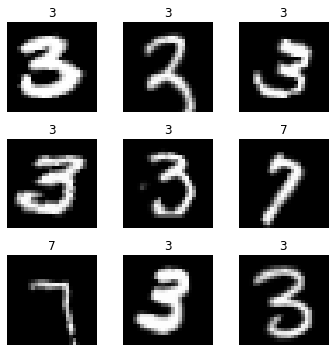

In [33]:
data.show_batch(rows=3,figsize=(5,5))

In [34]:
learn = cnn_learner(data,models.resnet18,metrics= accuracy)
learn.fit(2)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.201171,0.090976,0.967615,00:26
1,0.116199,0.058160,0.979392,00:24


In [35]:
 interp = ClassificationInterpretation.from_learner(learn)

In [39]:
interp.confusion_matrix()

array([[ 980,   30],
       [  12, 1016]])